# **Assignment 1 - Numerical Methods - Image Edge Detection**

Rabbani Nur Kumoro

21/472599/PA/20310

CSB

# **Libraries Used**

In [ ]:
import matplotlib.pyplot as plt # A plotting library used to create a variety of charts and graphs.
import numpy as np              # A library for numerical computing.
import urllib.request           # A module that provides a way to interact with URLs and download data from the internet.
from PIL import Image           # A library used for opening, manipulating, and saving different image file formats.

# **Load an Image from URL**

In [ ]:
url = 'https://i.pinimg.com/originals/33/d5/98/33d598eaab84e888e8bc2c1264effb69.jpg'
img = urllib.request.urlopen(url)

# **Convert the Image to a NumPy Array**

In [ ]:
img_arr = np.array(Image.open(img).convert('L'))

# **Taylor Series Function with Central Differences**

This is a function that takes an input image as an argument and computes its gradient using Taylor Series with Central Differences. The gradient represents the rate of change of intensity in the image, and can be used to identify areas of high contrast, such as edges or boundaries between objects in the image.

The function first initializes two matrices `grad_x` and `grad_y` of the same size as the input image with all elements set to zero.

Then, it computes the gradient of the input image in the x direction by looping through each column of the image and applying the central difference formula. Similarly, it computes the gradient in the y direction by looping through each row of the image and applying the same formula.

Next, the function combines the gradient in the x and y directions using the Euclidean distance formula to get the overall gradient of the image.

Finally, the function returns the computed gradient as a NumPy array.

In [ ]:
def derivative(image):

    # Compute the gradient using Taylor Series with Central Differences
    grad_x = np.zeros_like(image)
    grad_y = np.zeros_like(image)

    # Compute the gradient in the x direction
    for i in range(1, image.shape[1]-1):
        grad_x[:, i] = (image[:, i+1] - image[:, i-1]) / 2.0 + \
                       (image[:, i+1] - 2*image[:, i] + image[:, i-1]) / 12.0

    # Compute the gradient in the y direction
    for i in range(1, image.shape[0]-1):
        grad_y[i, :] = (image[i+1, :] - image[i-1, :]) / 2.0 + \
                       (image[i+1, :] - 2*image[i, :] + image[i-1, :]) / 12.0

    # Combine the gradient in x and y directions
    gradient = np.sqrt(np.square(grad_x) + np.square(grad_y))

    return gradient

# **Results**

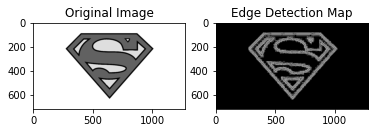

In [ ]:
# Apply the derivative function to the image
edge_map = derivative(img_arr)

# Display the original image and the edge detection map
fig, axs = plt.subplots(1, 2)
axs[0].imshow(img_arr, cmap='gray')
axs[0].set_title('Original Image')
axs[1].imshow(edge_map, cmap='gray')
axs[1].set_title('Edge Detection Map')
plt.show()